# Independent Lab: Inferential Statistics &#x1f4ca; <br>

In [3]:

# Load the modules

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # For the QQ plot
from scipy.stats import pearsonr # Correlation p-values
from sklearn.linear_model import LinearRegression # Regression Outpu
import statsmodels.formula.api as smf # ols regerssion

In [4]:

# Check the directory

os.getcwd()


'/home/schoo/Documents/python/week_9/week9labs-main'

Great! Now that we have the modules loaded and confirmed the current working directory, let's now start by reading in the text file and start playing with some stats!

In [9]:

#Load in the text file

ect_data = pd.read_table("data/ect_data.txt")

In [15]:

#Print to confirm

ect_data.head()

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
0,6,6,6,6,6,6,6,6,6,4,5,5,5,5,5,5
1,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6
2,6,6,6,6,7,7,7,7,6,5,5,5,5,5,5,5
3,7,7,7,7,6,6,7,6,5,5,5,5,7,6,7,6
4,7,7,6,6,7,7,7,6,6,6,7,7,6,6,6,6


Sweet! Everything looks good!

In [16]:
ect_data.describe(include=['number'])

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,6.094527,6.044776,5.791045,5.890547,6.199005,6.044776,6.258706,5.840796,5.890547,5.601990,5.920398,5.731343,5.512438,5.562189,5.487562,5.343284
std,0.935959,1.073771,1.070570,1.008940,1.019901,1.167470,0.939540,1.069826,1.076086,1.220982,1.154830,1.211389,1.118523,1.160760,1.212887,1.093877
min,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000
25%,6.000000,5.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [17]:
ect_data.dtypes

attitude1_01    int64
attitude1_02    int64
attitude1_03    int64
attitude1_04    int64
intent1_01      int64
intent1_02      int64
intent1_03      int64
intent1_04      int64
peruse01        int64
peruse02        int64
peruse03        int64
peruse04        int64
satis01         int64
satis02         int64
satis03         int64
satis04         int64
dtype: object

Looks like all of the datatypes are numerical. Meaning that we can use pretty much any columns for our linear regression model with the exclusion of the 'intent1' variables per the instructions. <br>

## Linearity

<AxesSubplot: xlabel='attitude1_01', ylabel='intent1_01'>

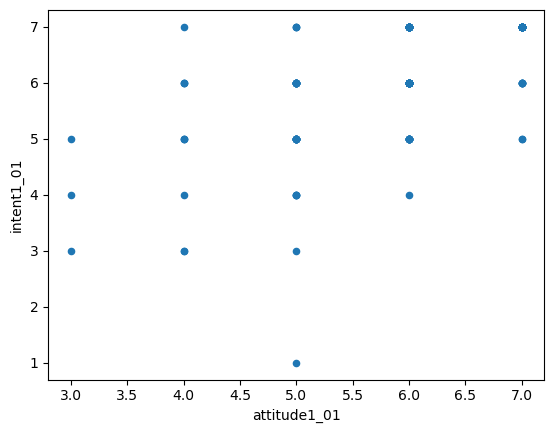

In [21]:

#Linearity Check

ect_data.plot.scatter(x='attitude1_01', y = 'intent1_01')


Seems to be somewhat linear with a slight positive relationship.

<AxesSubplot: xlabel='peruse01', ylabel='intent1_01'>

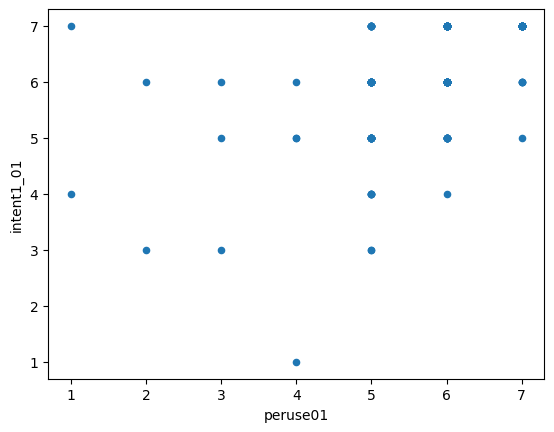

In [22]:
ect_data.plot.scatter(x='peruse01', y = 'intent1_01')

Seems somewhat linear, with an outlier or two.

<AxesSubplot: xlabel='peruse02', ylabel='intent1_01'>

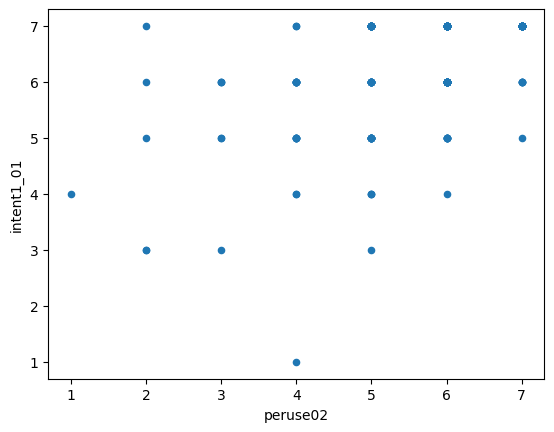

In [24]:
ect_data.plot.scatter(x='peruse02', y = 'intent1_01')

Appears to be linear

<AxesSubplot: xlabel='attitude1_02', ylabel='intent1_01'>

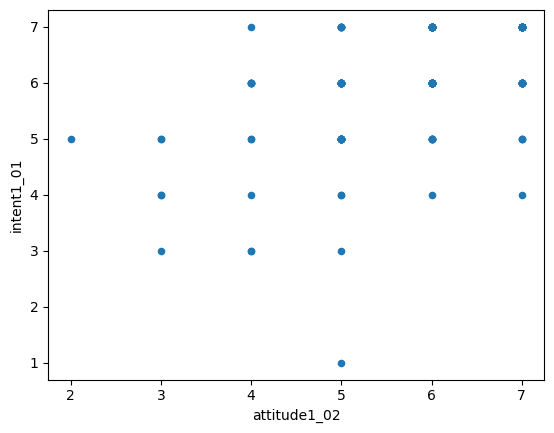

In [27]:
ect_data.plot.scatter(x='attitude1_02', y = 'intent1_01')

Appears to be lienar with a 

<AxesSubplot: xlabel='satis03', ylabel='intent1_01'>

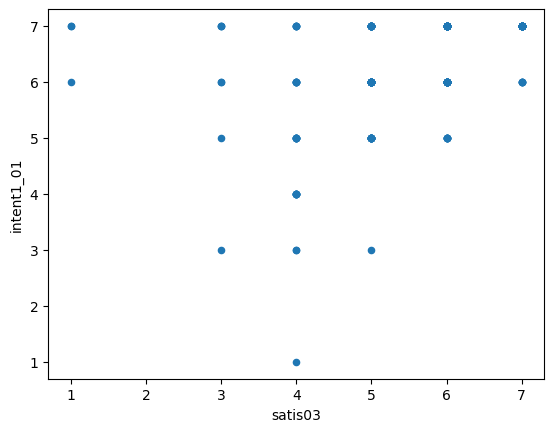

In [28]:
ect_data.plot.scatter(x='satis03', y = 'intent1_01')

Appears to be linear. <br>
Now let's check for collinearity: <br>
## Collinearity

In [33]:
ect_data.corr()

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
attitude1_01,1.000000,0.781832,0.748347,0.709922,0.666356,0.687054,0.654357,0.684226,0.576265,0.593120,0.622239,0.591388,0.569608,0.549134,0.483329,0.515116
attitude1_02,0.781832,1.000000,0.660611,0.622986,0.603616,0.704362,0.647626,0.650416,0.480259,0.547582,0.615780,0.551287,0.513672,0.517255,0.466889,0.523213
attitude1_03,0.748347,0.660611,1.000000,0.858235,0.519099,0.571588,0.471573,0.612550,0.453128,0.483051,0.544584,0.511677,0.519945,0.545646,0.463918,0.539753
attitude1_04,0.709922,0.622986,0.858235,1.000000,0.512032,0.560253,0.483636,0.581335,0.454046,0.492102,0.537477,0.495368,0.515158,0.518164,0.423812,0.478193
intent1_01,0.666356,0.603616,0.519099,0.512032,1.000000,0.886908,0.827830,0.757793,0.566642,0.529681,0.595103,0.488655,0.545688,0.500534,0.430458,0.494192
intent1_02,0.687054,0.704362,0.571588,0.560253,0.886908,1.000000,0.832684,0.786367,0.517334,0.489604,0.584902,0.478759,0.518394,0.505258,0.471791,0.508628
intent1_03,0.654357,0.647626,0.471573,0.483636,0.827830,0.832684,1.000000,0.722675,0.537531,0.552217,0.581282,0.513861,0.529800,0.466569,0.441605,0.472635
intent1_04,0.684226,0.650416,0.612550,0.581335,0.757793,0.786367,0.722675,1.000000,0.497286,0.521588,0.544137,0.491533,0.590820,0.555600,0.460866,0.628003
peruse01,0.576265,0.480259,0.453128,0.454046,0.566642,0.517334,0.537531,0.497286,1.000000,0.746810,0.753397,0.683090,0.399931,0.321710,0.198159,0.295438
peruse02,0.593120,0.547582,0.483051,0.492102,0.529681,0.489604,0.552217,0.521588,0.746810,1.000000,0.732724,0.728517,0.483252,0.423262,0.287002,0.391069


In [41]:

#Regression Model Creation

lin_reg_1 = LinearRegression(fit_intercept=True)
lin_reg_1.fit(ect_data[['attitude1_01','attitude1_02','peruse01','peruse02','satis03']], ect_data.intent1_01)

#Calculate the various VIF scores


# Attitude1_01

lin_reg_1.fit(ect_data[['attitude1_02','peruse01','peruse02','satis03']], ect_data.attitude1_01)
vif1 = 1/(1-lin_reg_1.score(ect_data[['attitude1_02','peruse01','peruse02','satis03']], ect_data.attitude1_01))


# Attitude1_02

lin_reg_1.fit(ect_data[['attitude1_01','peruse01','peruse02','satis03']], ect_data.attitude1_02)
vif2 = 1/(1-lin_reg_1.score(ect_data[['attitude1_01','peruse01','peruse02','satis03']], ect_data.attitude1_02))


#peruse01

lin_reg_1.fit(ect_data[['attitude1_01','attitude1_02','peruse02','satis03']], ect_data.peruse01)
vif3 = 1/(1-lin_reg_1.score(ect_data[['attitude1_01','attitude1_02','peruse02','satis03']], ect_data.peruse01))


#peruse02

lin_reg_1.fit(ect_data[['attitude1_01','attitude1_02','peruse01','satis03']], ect_data.peruse02)
vif4 = 1/(1-lin_reg_1.score(ect_data[['attitude1_01','attitude1_02','peruse01','satis03']], ect_data.peruse02))


#satis03

lin_reg_1.fit(ect_data[['attitude1_01','attitude1_02','peruse01','peruse02']], ect_data.satis03)
vif5 = 1/(1-lin_reg_1.score(ect_data[['attitude1_01','attitude1_02','peruse01','peruse02']], ect_data.satis03))


#Print out the VIF scores

print('VIF Attitude1_01: ', vif1,
     '\nVIF Attitude1_02: ', vif2,
     '\nVIF peruse01: ', vif3,
     '\nVIF peruse02: ', vif4,
     '\nVIF satis03: ', vif5)


VIF Attitude1_01:  3.186304302322818 
VIF Attitude1_02:  2.723871104783952 
VIF peruse01:  2.463649963292485 
VIF peruse02:  2.5646838967146763 
VIF satis03:  1.3665679344200399


All of the produced VIF scores are less than 5, indicating that there is likely no suffering of multilinearity.

## Homoscedasticity

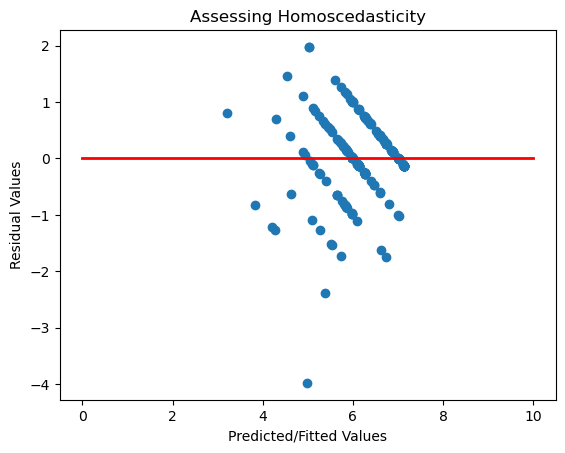

In [45]:

#Build the regression model to check for homoscedasticity

lin_reg_2 = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + peruse02 + satis03', ect_data).fit()

#Assess homoscedasticity

plt.scatter(lin_reg_2.fittedvalues, lin_reg_2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([0, 10],[0, 0], 'red', lw=2)   # add red horizontal line
plt.show()

## Independence

In [46]:
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     43.22
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           7.51e-30
Time:                        12:07:38   Log-Likelihood:                -213.71
No. Observations:                 201   AIC:                             439.4
Df Residuals:                     195   BIC:                             459.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9797      0.362      2.704      0.007       0.265       1.694
attitude1_01     0.3322      0.096      3.463      0.001       0.143       0.521
attitude1_02     0.1456      0.077      1.883      0.061      -0.007       0.298
peruse01         0.2614      0.073      3.562      0.000       0.117       0.406
peruse02         0.0127      0.066      0.193      0.848      -0.117       0.143
satis03          0.1283      0.048      2.646      0.009       0.033       0.224
==============================================================================
Omnibus:                       60.559   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.235
Skew:                          -1.083   Prob(JB):                     1.26e-59
Kurtosis:                       8.262   Cond. No.                         95.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Condition number is only 95.9, which may indicate that there is not very strong multicollinearity problems. <br>
The Durbin-Watson value of 1.886 falls within the range of 1.5-3. Suggesting that there is indipendence within these variables.

## Normality

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

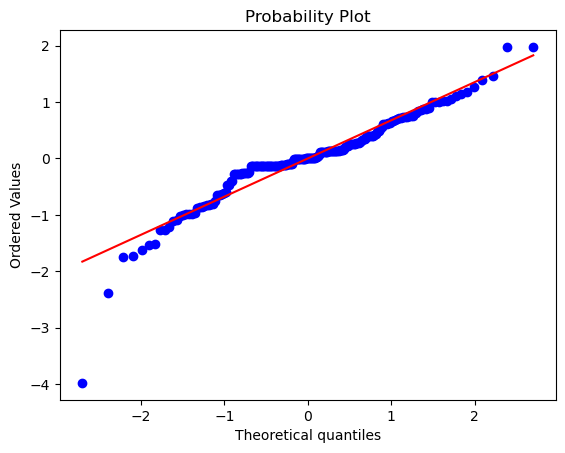

In [47]:
sts.probplot(lin_reg_2.resid, dist="norm", plot=plt)

This distribution appears to be somewhat normal. With some outliers being expected and observed. 

# Assessment of F-test and T-test

In [48]:
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     43.22
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           7.51e-30
Time:                        12:13:12   Log-Likelihood:                -213.71
No. Observations:                 201   AIC:                             439.4
Df Residuals:                     195   BIC:                             459.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9797      0.362      2.704      0.007       0.265       1.694
attitude1_01     0.3322      0.096      3.463      0.001       0.143       0.521
attitude1_02     0.1456      0.077      1.883      0.061      -0.007       0.298
peruse01         0.2614      0.073      3.562      0.000       0.117       0.406
peruse02         0.0127      0.066      0.193      0.848      -0.117       0.143
satis03          0.1283      0.048      2.646      0.009       0.033       0.224
==============================================================================
Omnibus:                       60.559   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.235
Skew:                          -1.083   Prob(JB):                     1.26e-59
Kurtosis:                       8.262   Cond. No.                         95.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see in the table above, that the t-value for the 'peruse02' variable is rather low, which indicates that there is little influence from this variable. The most influential variables appears to be the peruse_01 variable with the highest t-value. <br>
The second most significant variable is the attitue1_01 variable, with a t-score of 3.463 and a p-value of 0.001. This is very highly significant. <br>
The f-statistic is 43.22, indicating that there is a bit of variance within the model.